In [232]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as T
import math

%matplotlib inline

In [247]:
def largest_inner_crop(w,      # original image width
                       h,      # original image height
                       angle): # rotation angle value in degrees, counter-clockwise
    angle = math.radians(abs(angle))
    return (
        h*math.cos(angle)*(1-math.sin(angle))\
        -w*(math.sin(angle)**2)\
        -h*(math.sin(angle)**3)\
        +h*(math.sin(angle)**2)       
    )
    
def best_rotated_crop(image,
                      size,
                      rotation_degree): # rotation angle value in degrees, counter-clockwise
    if angle > 0:
        rotated_image = T.functional.rotate(image, rotation_degree, expand=True)
        x_dim, y_dim = T.functional.get_image_size(im)
        crop_width = largest_inner_crop(x_dim, y_dim, rotation_degree)
        print('Got {}'.format(crop_width))
        cropped_image = T.CenterCrop(crop_width)(rotated_image)
        resized_image = T.Resize(size)(cropped_image)
    else:
        print('No rotation')
    
    return resized_image

In [248]:
im = Image.open('dataset/photos/LUszRyY6EkT3jFk0_fxWvg.jpg')
angle = 5
rotat = T.functional.rotate(im, angle, expand=True)
aug = best_rotated_crop(im, 224, angle)

im2 = Image.open('dataset/photos/AgLTEIZunB0lMDAel3zrUw.jpg')
angle1 = -30
rotat2 = T.functional.rotate(im2, angle1, expand=True)
aug2 = best_rotated_crop(im2, 224, angle1)

im3 = Image.open('dataset/photos/FUz75p5MtnA-xK5I8s0AWQ.jpg')
angle2 = 30
rotat3 = T.functional.rotate(im3, angle2, expand=True)
aug3 = best_rotated_crop(im3, 224, angle2)

Got 361.0478960035206
Got 72.64706805499553
Got 72.64706805499553


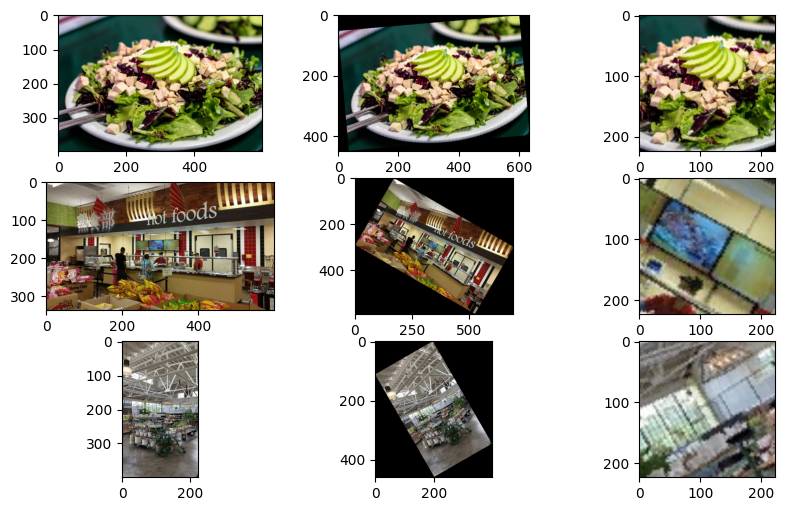

In [249]:
fig, ax = plt.subplots(3, 3, figsize=(10,6))
ax[0,0].imshow(im)
ax[0,1].imshow(rotat)
ax[0,2].imshow(aug)
ax[1,0].imshow(im2)
ax[1,1].imshow(rotat2)
ax[1,2].imshow(aug2)
ax[2,0].imshow(im3)
ax[2,1].imshow(rotat3)
ax[2,2].imshow(aug3)